In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'Name':['Shubham', 'Pratik','Siddharth','Sanjivani','Adi','Akash'],
    'Age' :[21 , 22, 21 , np.nan , 23 , 24],
    'Math_Score' :[77 , 96 , 85 , 92 , 60 , np.nan],
    'Science_Score' :[95 , 96 , np.nan , 95 , 80 , 85],
    'Hindi':[np.nan , 73 , 66 , 70 , 65 , 60]
}

In [3]:
data

{'Name': ['Shubham', 'Pratik', 'Siddharth', 'Sanjivani', 'Adi', 'Akash'],
 'Age': [21, 22, 21, nan, 23, 24],
 'Math_Score': [77, 96, 85, 92, 60, nan],
 'Science_Score': [95, 96, nan, 95, 80, 85],
 'Hindi': [nan, 73, 66, 70, 65, 60]}

In [4]:
df = pd.DataFrame(data)

In [5]:
df.to_csv('Academic_performance.csv')

In [6]:
df.isnull().sum()

Name             0
Age              1
Math_Score       1
Science_Score    1
Hindi            1
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           6 non-null      object 
 1   Age            5 non-null      float64
 2   Math_Score     5 non-null      float64
 3   Science_Score  5 non-null      float64
 4   Hindi          5 non-null      float64
dtypes: float64(4), object(1)
memory usage: 372.0+ bytes


In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [9]:
df

,Name,Age,Math_Score,Science_Score,Hindi
0,Shubham,21.0,77.0,95.0,NaN
1,Pratik,22.0,96.0,96.0,73.0
2,Siddharth,21.0,85.0,NaN,66.0
3,Sanjivani,22.2,92.0,95.0,70.0
4,Adi,23.0,60.0,80.0,65.0
5,Akash,24.0,NaN,85.0,60.0


In [10]:
df['Hindi'] = df['Hindi'].fillna(df['Hindi'].mean())

In [11]:
df

,Name,Age,Math_Score,Science_Score,Hindi
0,Shubham,21.0,77.0,95.0,66.8
1,Pratik,22.0,96.0,96.0,73.0
2,Siddharth,21.0,85.0,NaN,66.0
3,Sanjivani,22.2,92.0,95.0,70.0
4,Adi,23.0,60.0,80.0,65.0
5,Akash,24.0,NaN,85.0,60.0


In [12]:
df.loc[0, 'Hindi'] = 150

In [13]:
df.loc[4 , 'Hindi']= 20

In [14]:
df

,Name,Age,Math_Score,Science_Score,Hindi
0,Shubham,21.0,77.0,95.0,150.0
1,Pratik,22.0,96.0,96.0,73.0
2,Siddharth,21.0,85.0,NaN,66.0
3,Sanjivani,22.2,92.0,95.0,70.0
4,Adi,23.0,60.0,80.0,20.0
5,Akash,24.0,NaN,85.0,60.0


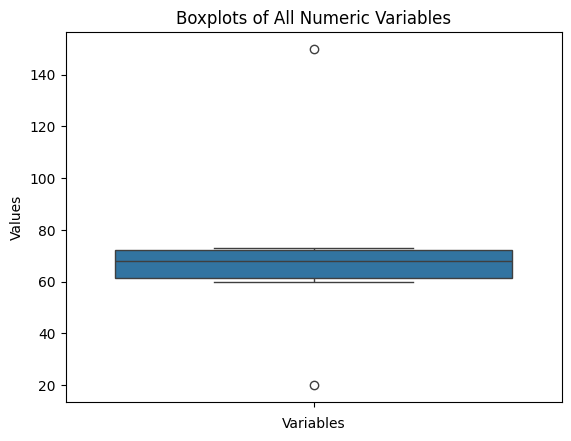

In [15]:
sns.boxplot(data=df['Hindi'])
plt.title("Boxplots of All Numeric Variables")
plt.xlabel("Variables")
plt.ylabel("Values")
plt.show()

In [17]:
df

,Name,Age,Math_Score,Science_Score,Hindi
0,Shubham,21.0,77.0,95.0,150.0
1,Pratik,22.0,96.0,96.0,73.0
2,Siddharth,21.0,85.0,NaN,66.0
3,Sanjivani,22.2,92.0,95.0,70.0
4,Adi,23.0,60.0,80.0,20.0
5,Akash,24.0,NaN,85.0,60.0


In [18]:
q1 = df['Hindi'].quantile(0.25)
q3 = df['Hindi'].quantile(0.75)

In [19]:
IQR = q3-q1

In [20]:
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

In [21]:
lower_bound ,upper_bound


(45.375, 88.375)

In [22]:
df_no_outliers = df[(df['Hindi']<lower_bound)|(df['Hindi']>upper_bound)]

In [23]:
df_no_outliers

,Name,Age,Math_Score,Science_Score,Hindi
0,Shubham,21.0,77.0,95.0,150.0
4,Adi,23.0,60.0,80.0,20.0


In [24]:
indices_to_drop = df_no_outliers.index # finding indexes to remove outliers
df = df.drop(indices_to_drop)

In [25]:
df

,Name,Age,Math_Score,Science_Score,Hindi
1,Pratik,22.0,96.0,96.0,73.0
2,Siddharth,21.0,85.0,NaN,66.0
3,Sanjivani,22.2,92.0,95.0,70.0
5,Akash,24.0,NaN,85.0,60.0


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaled_df = df.copy()

In [39]:
scaler = MinMaxScaler()

In [40]:
scaled_df['Hindi'] = scaler.fit_transform(df[['Hindi']])

In [41]:
scaled_df

,Name,Age,Math_Score,Science_Score,Hindi
1,Pratik,22.0,96.0,96.0,1.000000
2,Siddharth,21.0,85.0,NaN,0.461538
3,Sanjivani,22.2,92.0,95.0,0.769231
5,Akash,24.0,NaN,85.0,0.000000
